In [75]:
# Importando as bibliotecas padrão 

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning 
from sklearn import metrics # analisa a acurácia de nossos modelos

# Ocultando Warnings indesejados
import warnings
warnings.filterwarnings('ignore')

In [76]:
# importando nossa base de dados
from sklearn.datasets import load_breast_cancer #importando a base de dados nativas no sklearn

dados=load_breast_cancer() # Carregando base de dados

# vamos ver a descrição de nossa base de dados
print(dados.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [77]:
cancer=pd.DataFrame(data=dados.data, columns=dados.feature_names) # convertendo para dataframe com ajuda do Pandas

cancer['Class']=dados.target # Adicionando a nossa Target

In [78]:
# Um dataframe Pandas parece muito com uma tabela Excel

cancer.head(3) # Visualizando as 3 primeiras linhas de nosso dataframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [79]:
# Distribuição de nossas classes
cancer['Class'].value_counts() # 1- Benigno 0 = Máligno

"""
output:
    1:    357
    0:    212
"""

'\noutput:\n    1:    357\n    0:    212\n'

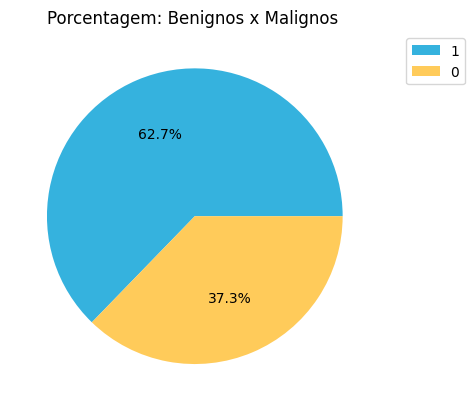

In [80]:
# Temos a informação: 357 casos benignos e 212 casos malignos.

# Vamos visualizar isso melhor
# Criando um Gráfico de Pizza - ou no inglês um gráfico de torta(PiePlot)

colors=['#35b2de','#ffcb5a'] # Apenas escolhando as cores

labels=cancer['Class'].value_counts().index
plt.pie(cancer['Class'].value_counts(),autopct='%1.1f%%',colors=colors) # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(labels,bbox_to_anchor=(1.25,1),) # Nossas Legendas
plt.title('Porcentagem: Benignos x Malignos ')
plt.show()

In [81]:
""" 

Assumindo que queremos uma base de dados 50/50, onde sabemos ter 357 diagnósticos benignos e 212 málignos, logo concluímos que vamos ter de excluir 145 casos benignos.

357 - 212 = 145, certo?

Entendeu? Nós vamos usar todos os casos málignos que temos a disposição (212), mais a mesma quantidade de casos benignos.

Entretanto, seria interessante dentre os 357 diagnósticos benignos, escolher os melhores para compor a nova base de dados. Ou seja dentre os 357 casos vamos selecionar os melhores 212.

Mas qual critério usar para isso?

Existem várias critérios que poderiamos levar em consideração! Por exemplo:

Possívelmente temos em nossa base de dados, registros ou no caso diagnósticos, onde nem todas as variáveis estão preenchidas, enquanto outros possuem todas as informações. Lógicamente deveriamos dar prioridade para os registros completos certo?

"""


# Vamos criar nossas amostras para a construção dos modelos
# Vamos usar mais uma vez a biblioteca sklearn
from sklearn.model_selection import train_test_split

# primeiro vamos dividir nossa base de dados entre features e target
X= cancer.drop('Class', axis=1) # Selecionando todas as linhas, da primeira coluna até a penúltima coluna.
Y=cancer['Class'] # Selecionando todas as linhas da última coluna ['Class'].


x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)
# test-size: neste casos vamos dividir nosso dataset em 70% treino e 30% teste
# random_state: vamos selecionar de forma aleatória

In [82]:
# Agora temos nossas bases de dados para treino e testes 
print('X treino',x_train.shape)
print('X test',x_test.shape)
print('Y treino',y_train.shape)
print('Y test',y_test.shape)

X treino (398, 30)
X test (171, 30)
Y treino (398,)
Y test (171,)


In [83]:
# importando nosso modelo logisticRegression
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression() # Criando o modelo
logreg.fit(x_train,y_train) # Treinando o modelo
y_pred=logreg.predict(x_test) # predizendo
acc_logreg=round(metrics.accuracy_score(y_pred,y_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print("{}% de acurácia".format(acc_logreg,))

97.1% de acurácia


In [84]:
# importando nosso modelo svc
from sklearn.svm import SVC

svc=SVC() # Criando o modelo
svc.fit(x_train,y_train) # Treinando o modelo
y_pred=svc.predict(x_test) # predizendo
acc_svc=round(metrics.accuracy_score(y_pred,y_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print(acc_svc,"% de acurácia")

93.6 % de acurácia


In [85]:
# importando nosso modelo ecision tree
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier() # Criando o modelo
tree.fit(x_train,y_train) # Treinando o modelo
y_pred=tree.predict(x_test) # predizendo
acc_tree=round(metrics.accuracy_score(y_pred,y_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print(acc_tree,"% de acurácia")

92.4 % de acurácia


In [86]:
# importando nosso modelo random forest
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=100) # Criando o modelo
forest.fit(x_train,y_train) # Treinando o modelo
y_pred=forest.predict(x_test) # predizendo
acc_forest=round(metrics.accuracy_score(y_pred,y_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print(acc_forest,"% de acurácia")

97.1 % de acurácia


93.6 % de acurácia


Text(0, 0.5, 'Teste de Acurácia')

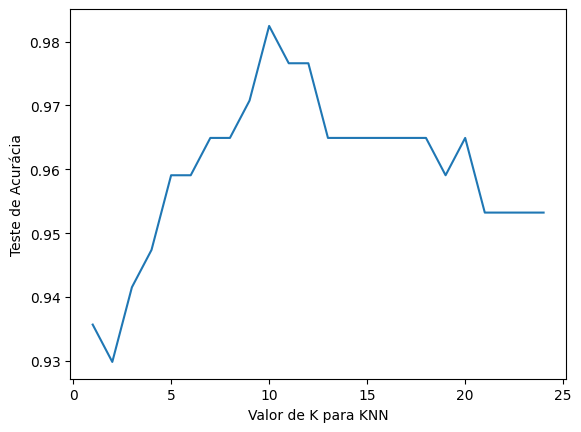

In [87]:
# importando nosso modelo KNN
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1) # Criando o nosso classificador
knn.fit(x_train,y_train) # Treinando o modelo
y_pred=knn.predict(x_test) # Predizendo nossos dados de testet
acc_knn=round(metrics.accuracy_score(y_pred,y_test)*100,1)
print(acc_knn,"% de acurácia") # Exibindo resultado

# É Simples, vamos construir modelos KNN dentro de um for, e testar qual são os melhores resultados.

k_range=range(1,25) # vamos testar n_neighbors de 1 a 25
scores=[] # vamos armazenar os resultados aqui

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_pred,y_test))

# Por último vamos gerar uma visualização para chegarmor ao veredito.
plt.plot(k_range,scores)
plt.xlabel("Valor de K para KNN")
plt.ylabel("Teste de Acurácia")

In [88]:
# importando nosso modelo gausean model
from sklearn.naive_bayes import GaussianNB

gaussian=GaussianNB() # Criando o modelo
gaussian.fit(x_train,y_train) # Treinando o modelo
y_pred=gaussian.predict(x_test) # predizendo
acc_gaussian=round(metrics.accuracy_score(y_pred,y_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print(acc_gaussian,"% de acurácia")

94.2 % de acurácia


In [89]:
modelos=pd.DataFrame({'Modelos':['Regressão Logística','Support Vector Machine',\
                    'Gaussian Naive Bayes','Árvore de Decisão',\
                    'Random Forest','KNN'],\
         'Score':[acc_logreg,acc_svc,acc_gaussian,acc_tree,acc_forest,acc_knn]})

modelos.sort_values(by="Score", ascending=False)

,Modelos,Score
0,Regressão Logística,97.1
4,Random Forest,97.1
2,Gaussian Naive Bayes,94.2
1,Support Vector Machine,93.6
5,KNN,93.6
3,Árvore de Decisão,92.4
